#Threshold Model: the influence of topology


We import the libraries we need for the simulation:


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random


We define two different graph: the first one is an Erdos-Renyi network- which have a Binomial/Poisson degree distribution- and a Albert Barabasi one- which have instead a power law distribution. Then we set the number of step for which we carry out the simulation.  

In [76]:
G = nx.erdos_renyi_graph(500, 0.2)
G1 = nx.barabasi_albert_graph(500, 2)
steps = 20

Text(0.5, 1.0, 'Erdos-Renyi Graph')

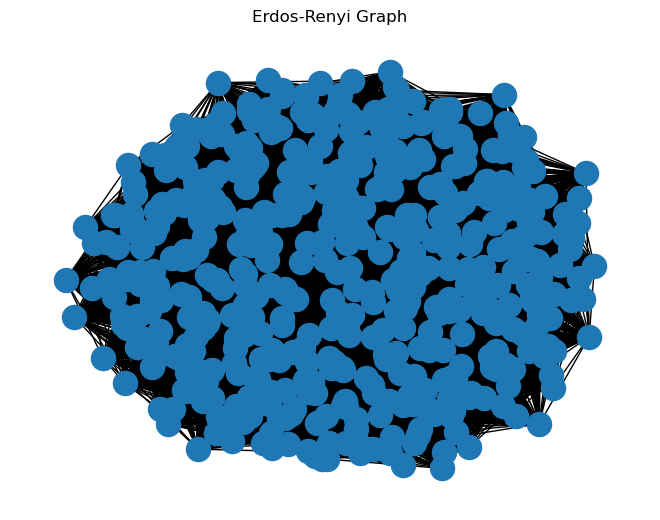

In [77]:
nx.draw(G)
plt.title("Erdos-Renyi Graph")

Text(0.5, 1.0, 'Albert Barabasi Graph')

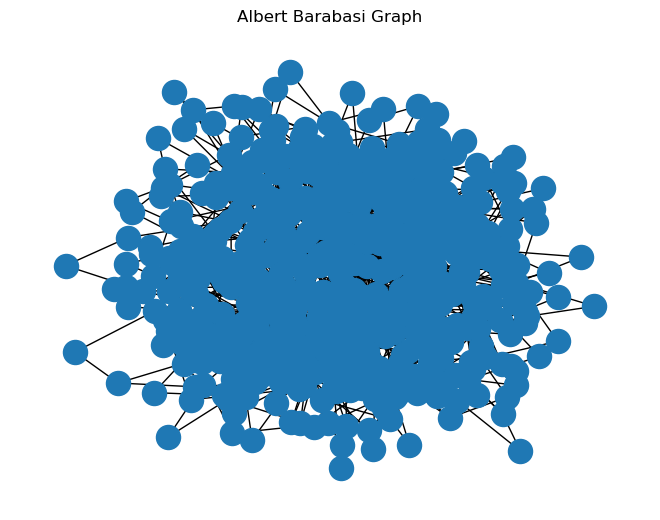

In [78]:
nx.draw_spring(G1)
plt.title("Albert Barabasi Graph")

The next two functions define the threshold for each node in the network. In the most trivial way, we just multilply the degree for a random number between 0 and 1. 

Text(0.5, 1.0, 'Threshold Albert Barabasi')

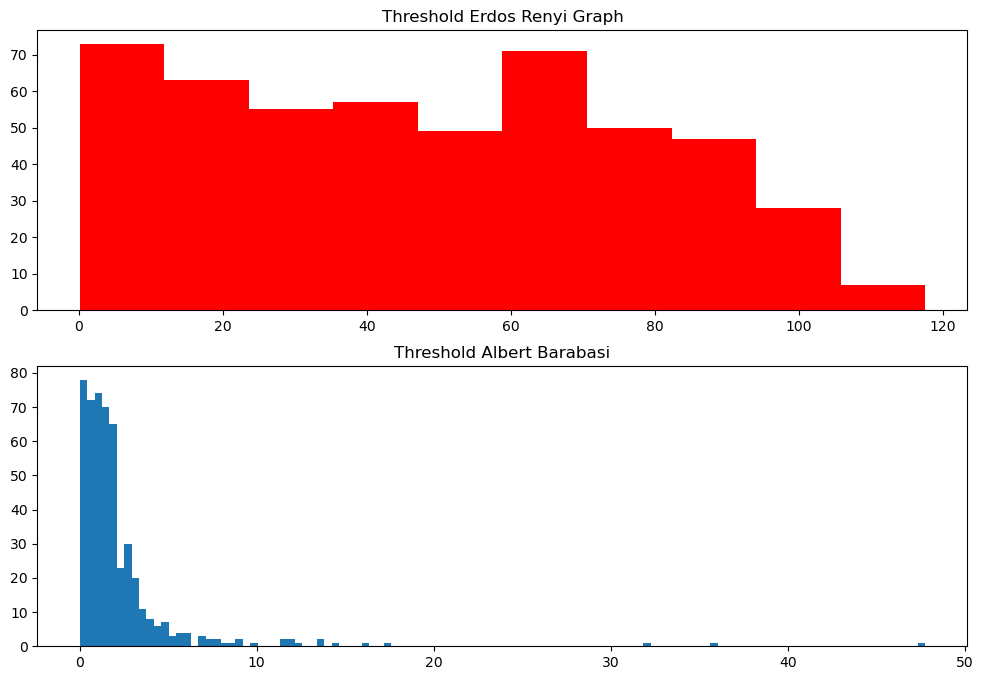

In [79]:
def calculate_threshold(G):
    threshold = [G.degree(i) * random.random() for i in G.nodes()]
    return threshold

threshold=calculate_threshold(G)
threshold1=calculate_threshold(G1)
fig, ax=plt.subplots(2, 1, figsize=(12,8))
ax[0].hist(threshold, bins="auto", color="red")
ax[0].set_title("Threshold Erdos Renyi Graph")
ax[1].hist(threshold1, bins="auto")
ax[1].set_title("Threshold Albert Barabasi")

In order to initialize the model we need a seed of nodes who are active at time $t=0$. 

In [80]:
def seed_set(G, m):
    spin = np.zeros(len(G))
    seed = random.sample(list(G.nodes()), m)
    for i in seed:
        spin[i] = 1 
    return spin, seed

spin, seed= seed_set(G, 5)
spin1, seed1=seed_set(G1, 5)
print(seed)
print(seed1)

[384, 365, 22, 320, 422]
[149, 57, 337, 224, 403]


The next function carry out the simulation. In particular, for every step, it check wheter, for each node, the number of neighbours is bigger than the threshold. If it is so, the node get infected. 

In [81]:
def threshold_model(G, steps, spin, threshold, seed):
    infected = [set(seed)]
    fraction_infected = np.zeros(steps + 1)
    fraction_infected[0] = len(seed) / len(G)
    for t in range(steps):
        newly_infected = set()
        for i in G.nodes():
            if spin[i] == 0 and sum(spin[j] for j in G.neighbors(i)) > threshold[i]:
                spin[i] = 1
                newly_infected.add(i)
        infected.append(newly_infected)
        fraction_infected[t + 1] = sum(len(inf) for inf in infected) / len(G)
    return fraction_infected


As we have said earlier, we simulate the process on two different graphs: an Erdos Renyi (graph $G$) and an Albert Barabasi one (graph $G1$) and we plot the fraction of individual infected over time for each simulation. 

In [82]:
num_simulations = 5
steps = 20

for sim in range(num_simulations):
    threshold = calculate_threshold(G)
    threshold_1 = calculate_threshold(G1)
    spin, seed = seed_set(G, 20)
    spin1, seed1 = seed_set(G1, 20)
    fraction_infected = threshold_model(G, steps, spin, threshold, seed)
    fraction_infected1 = threshold_model(G1, steps, spin1, threshold_1, seed1)

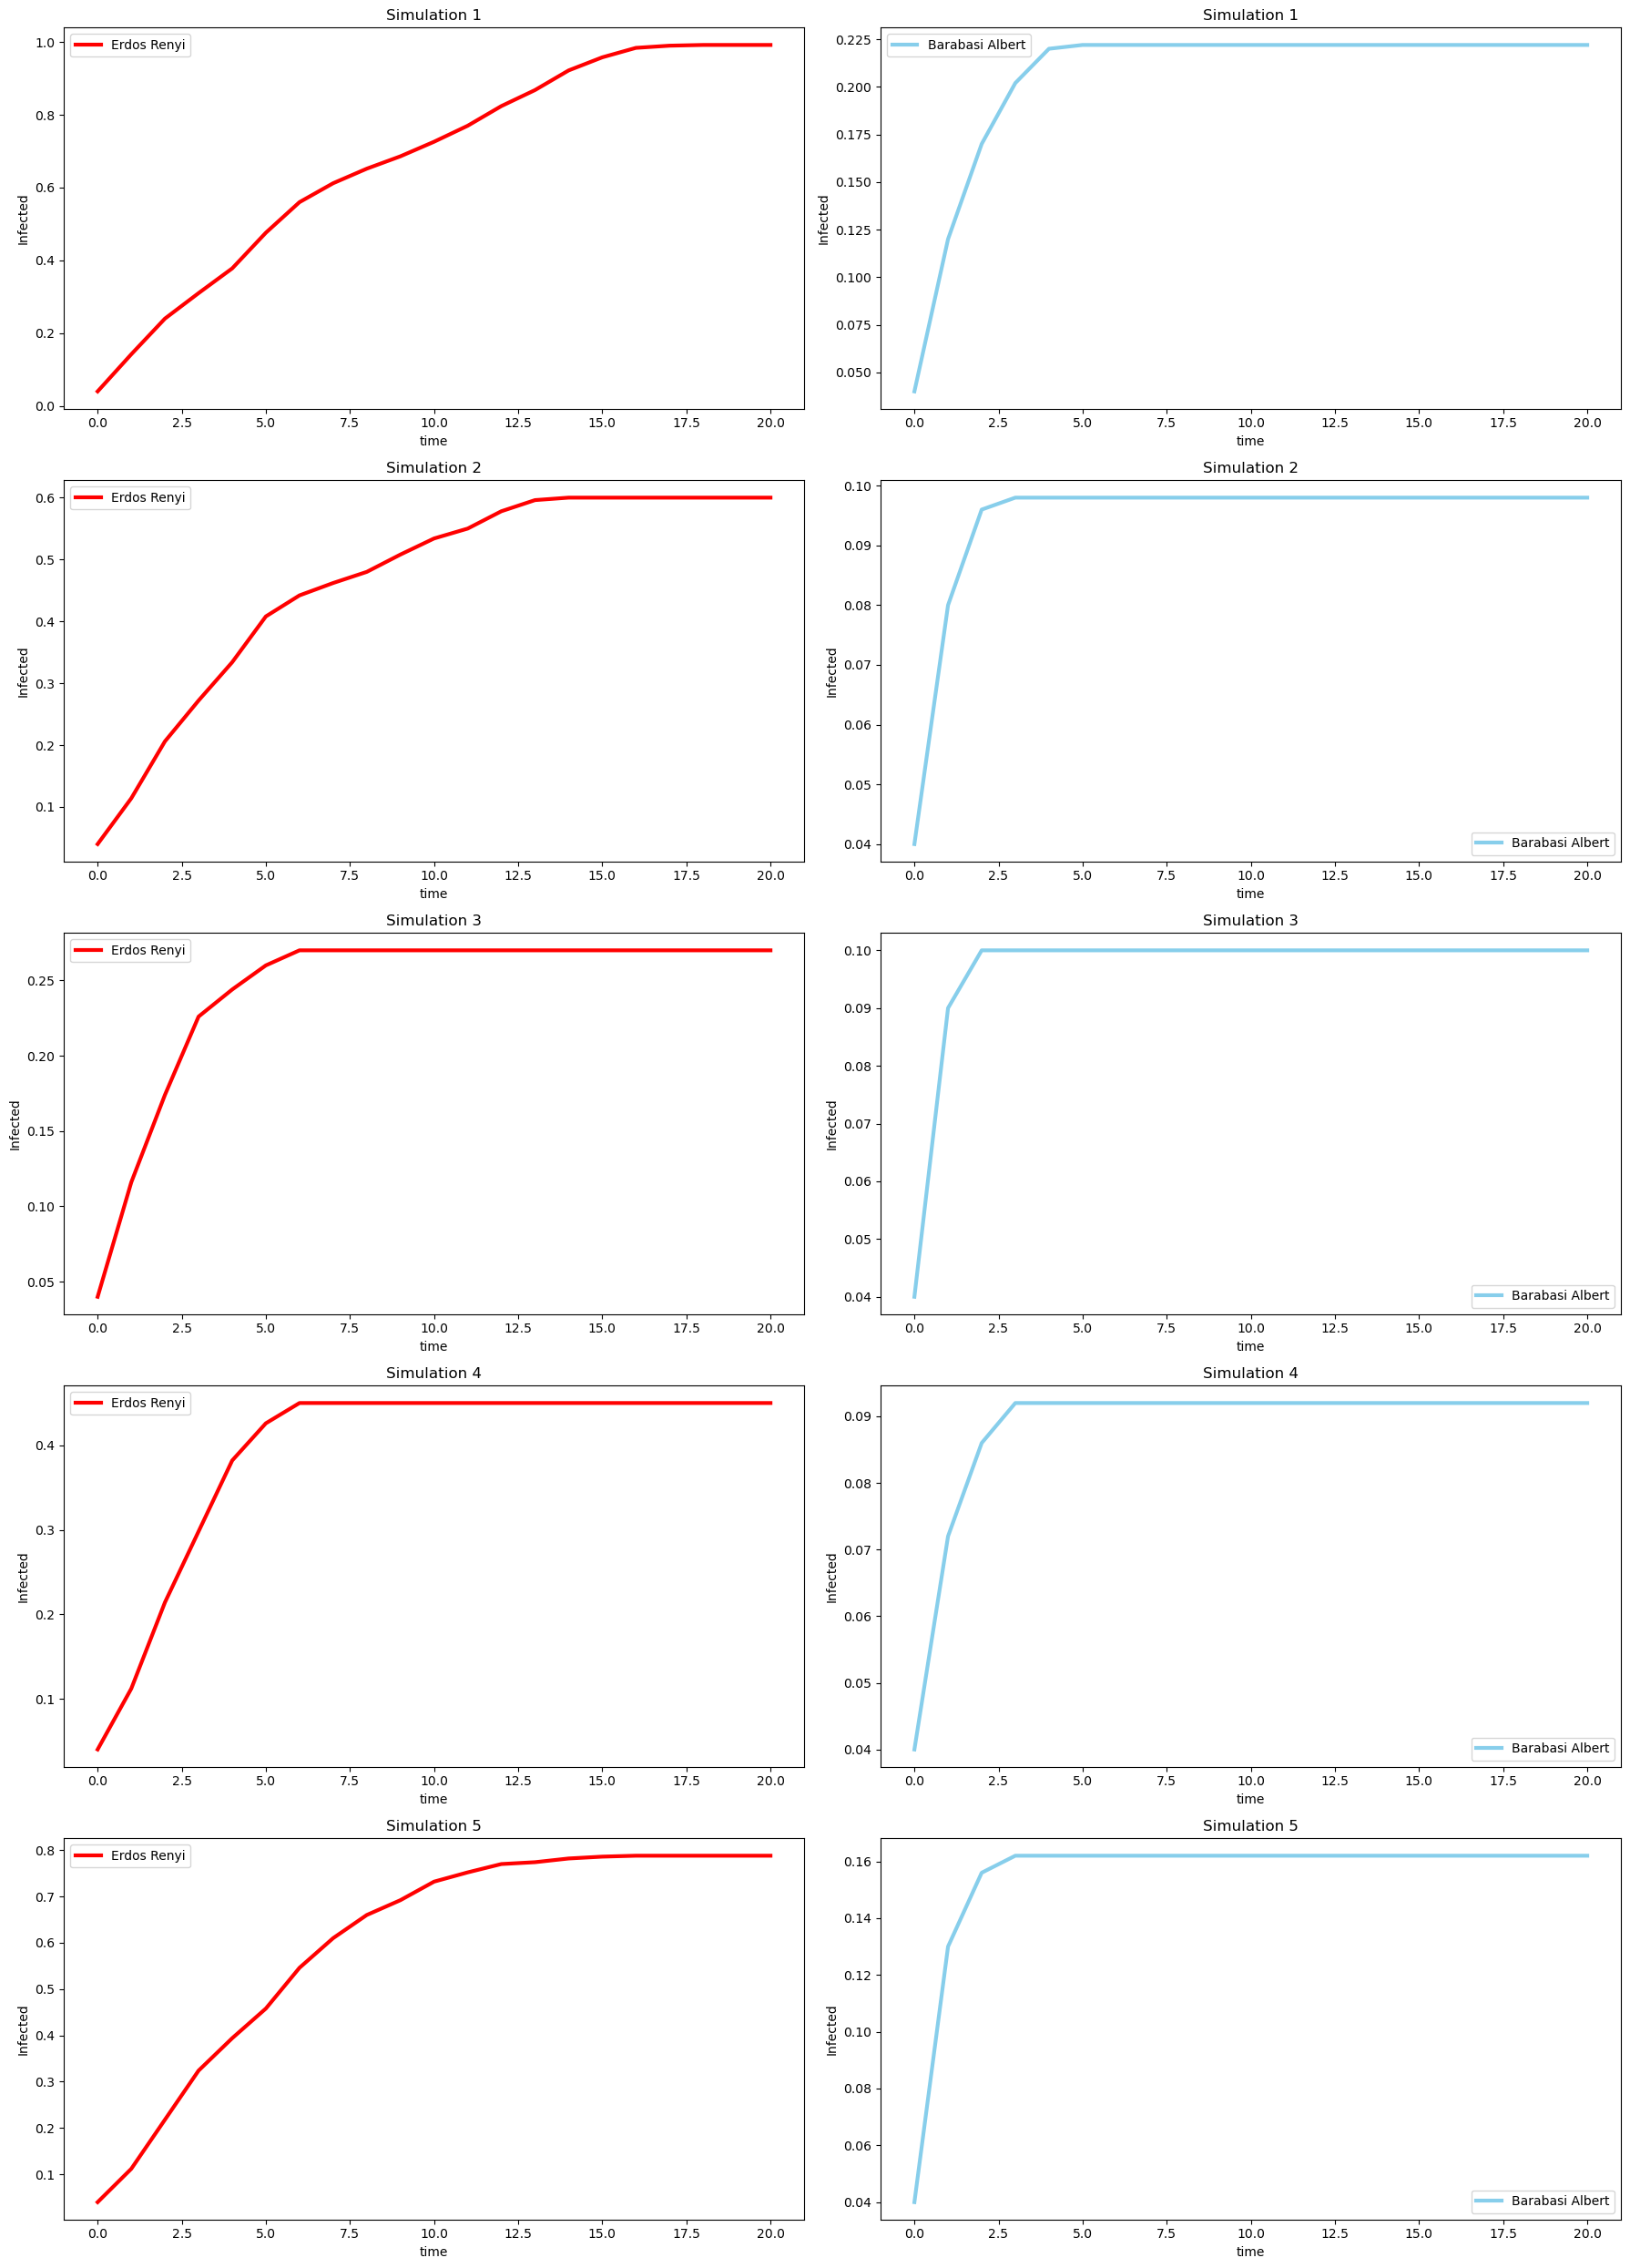

In [84]:
fig, axs = plt.subplots(num_simulations, 2, figsize=(18, 5*num_simulations))

for sim in range(num_simulations):
    threshold = calculate_threshold(G)
    threshold_1 = calculate_threshold(G1)
    spin, seed = seed_set(G, 20)
    spin1, seed1 = seed_set(G1, 20)
    fraction_infected = threshold_model(G, steps, spin, threshold, seed)
    fraction_infected1 = threshold_model(G1, steps, spin1, threshold_1, seed1)
    
    axs[sim, 0].plot(range(steps + 1), fraction_infected, linewidth=3, color="red", label="Erdos Renyi")
    axs[sim, 0].set_ylabel("Infected")
    axs[sim, 0].set_xlabel("time")
    axs[sim, 0].set_title(f"Simulation {sim+1}")
    axs[sim, 0].legend()
    
    axs[sim, 1].plot(range(steps + 1), fraction_infected1, linewidth=3, color="skyblue", label="Barabasi Albert")
    axs[sim, 1].set_ylabel("Infected")
    axs[sim, 1].set_xlabel("time")
    axs[sim, 1].set_title(f"Simulation {sim+1}")
    axs[sim, 1].legend()

plt.tight_layout()
plt.show()
